In [2]:
import pandas as pd 
import numpy as np

In [3]:
data = pd.read_csv("Bot_data.csv")

In [4]:
data.head(3)

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100
1,1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300
2,2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048573 entries, 0 to 1048572
Data columns (total 19 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   Unnamed: 0                   1048573 non-null  int64 
 1   ctry_name                    1048573 non-null  object
 2   intgrtd_mngmt_name           1048573 non-null  object
 3   intgrtd_operating_team_name  1048573 non-null  object
 4   city                         1001987 non-null  object
 5   st                           1003128 non-null  object
 6   sec_lvl_domn                 729116 non-null   object
 7   device_type                  206532 non-null   object
 8   operating_sys                1046753 non-null  object
 9   ip_addr                      1048573 non-null  object
 10  user_agent                   1048567 non-null  object
 11  VISIT                        1048573 non-null  int64 
 12  ENGD_VISIT                   1048573 non-null  int64 
 1

In [6]:
data.describe()

,Unnamed: 0,VISIT,ENGD_VISIT,VIEWS,wk,mth,yr
count,1.048573e+06,1.048573e+06,1.048573e+06,1.048573e+06,1048573.0,1048573.0,1048573.0
mean,5.242860e+05,1.108003e+00,3.440018e-01,1.410784e+00,11.0,3.0,2019.0
std,3.026971e+05,2.359586e+00,1.157801e+00,3.242692e+00,0.0,0.0,0.0
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,11.0,3.0,2019.0
25%,2.621430e+05,1.000000e+00,0.000000e+00,1.000000e+00,11.0,3.0,2019.0
50%,5.242860e+05,1.000000e+00,0.000000e+00,1.000000e+00,11.0,3.0,2019.0
75%,7.864290e+05,1.000000e+00,1.000000e+00,1.000000e+00,11.0,3.0,2019.0
max,1.048572e+06,1.195000e+03,6.940000e+02,1.196000e+03,11.0,3.0,2019.0


In [7]:
print("The Total num of rows and columns in data is  ",data.shape)

The Total num of rows and columns in data is   (1048573, 19)


In [8]:
print("There are some null values in data",data["sec_lvl_domn"].isnull().sum())

There are some null values in data 319457


In [9]:
data['page_vw_ts'] = pd.to_datetime(data['page_vw_ts'])

In [10]:
data['page_vw_ts'].dt.year.head() 

0    2019.0
1    2019.0
2    2019.0
3    2019.0
4    2019.0
Name: page_vw_ts, dtype: float64

Filtering and sorting 

In [11]:
data['crm_dt'] = data['page_vw_ts'].dt.date

In [12]:
data.head(1)

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,crm_dt
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100,2019-06-04


In [13]:
# Delete the page_vw_ts column

data = data.drop('page_vw_ts', 1)

data.head()

C:\Users\Mukesh\AppData\Local\Temp\ipykernel_2820\996027685.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('page_vw_ts', 1)


,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,crm_dt
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04
1,1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04
2,2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04
3,3,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,MOBILEPHONE,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,1,0,1,www.ibm.com/analytics/br/pt/business-intelligence,11,3,2019,2019-06-04
4,4,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,MOBILEPHONE,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,1,0,1,www.ibm.com/watson/fr-fr,11,3,2019,2019-06-04


In [14]:
#DATA Preprocessing on ip_info Dataset

In [15]:
data.dropna(subset=['city','st','operating_sys'], inplace=True)
data.device_type.fillna(value='unkown_device', inplace=True)
data.sec_lvl_domn.fillna(value='unkown_domain', inplace=True)
data.dropna(inplace=True)
data.drop(labels=['wk', 'mth', 'yr', 'crm_dt'], axis=1, inplace=True)

In [16]:
#Adding a Bounce_rate Column

In [17]:
data["bounce_rate_%"] = ((data.VISIT - data.ENGD_VISIT)/data.VISIT)*100

In [18]:
data.head(2)

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,bounce_rate_%
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,100.0
1,1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,100.0


In [19]:
print("Total of No. Of unique IP's is =",data.ip_addr.nunique())

Total of No. Of unique IP's is = 443870


#We can't work on all the ip's that visit our website in a day 
because many of them just visit only a single time So we try 
o filter those ip's that has high no. of views or visit 
too mant times, In rules Of detecting bot it is mentioned 
that bots show a similar pattern in visiting any website...



In [20]:
# IP Addres's that has total views greater than 24 in a day
ip_views = pd.DataFrame(data.groupby('ip_addr').VIEWS.sum().sort_values())
unique_ip_address = list(ip_views[ip_views.VIEWS > 24].index)

# Limiting the Dataset to those rows that contain one of the ip's present in unique_ip_address 
new_data = data[data.ip_addr.isin(unique_ip_address)]

# Taking intersection of ip's
#unique_ip_address = list(new_data_details.ip_addr.unique())

# These are the filterd IP's on which we have to find Infomation.
print("No. Of unique ip's {}".format(len(unique_ip_address)))

# Examples of unique ip address
unique_ip_address[:10]

No. Of unique ip's 7231


['38d87886d615dd8e5f3f92d4b3bc7c344e4125633e6ea0cc90f70a5bffc1a69a',
 '2d514edec300dea1ee1eae5170bd1dd24c6e628d2f28074ec7ffe62ccb009b00',
 'bc47449f582bde3943caa85c67a59a7c2b5dee4d2800a4ee8723e065d68eb74e',
 '7a8211f17123bbd84bbfd914498104a1f42932a691f5eb6299fe7217e3dc67a3',
 'ee1c6a74446bbf39ac19431e415c431e4c6e47f9a415bbd514e3c6d1acb6386b',
 '14fdc36060a6c319e7f616157cc48d83c253caccac6ac1d2838de56c1e23ce6d',
 '5134b48b14c000e886c74619ee11cccb1dbe98c6ed3c3dc82550a7a33bc6d9ee',
 '16ebc267de6c5c886c7c515fbac4b9137abe0611f8ceba82835faa44913e1ad1',
 '23e225f92cf2669e1aa550a7e4a92efa943474e02c78aea18bb35774032bf497',
 '13656abd7d885ddee912bd9d8a96a2feed0362a8383ac7527d74e777e3d40ab0']

In [21]:
data.head()

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,bounce_rate_%
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,100.0
1,1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,100.0
2,2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,100.0
3,3,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,MOBILEPHONE,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,1,0,1,www.ibm.com/analytics/br/pt/business-intelligence,100.0
4,4,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,MOBILEPHONE,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,1,0,1,www.ibm.com/watson/fr-fr,100.0


In [22]:
new_data.head()

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,bounce_rate_%
22,22,United States,United States,North America,DALLAS,TEXAS,unkown_domain,MOBILEPHONE,ANDROID_7.1.2,6b9a0b17ec5766e271c837487b5664652541413a9e642e...,MOZILLA/5.0 (LINUX; ANDROID 7.1.2; LM-X210CM) ...,2,0,2,www-01.ibm.com/support/docview.wss?uid=swg2703...,100.0
24,24,Germany,DACH,Europe,HANNOVER,NIEDERSACHSEN,MH-HANNOVER.DE,unkown_device,MICROSOFT_WINDOWS7,25e61bd91b3c3213f470aa1d86ef7fd53f53b86477774c...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64; RV:60.0) G...,1,0,1,careers.ibm.com/listjobs/all/search/position-t...,100.0
26,26,Singapore,ASEAN,Asia Pacific,SINGAPORE,NONE,MYREPUBLIC.COM.SG,unkown_device,MICROSOFT_WINDOWS10,c68680caf20e4a3b13fd13ccb8a6c7eabe5e7518300237...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,1,www.ibm.com/support/knowledgecenter/en/ssprek_...,0.0
28,28,Singapore,ASEAN,Asia Pacific,SINGAPORE,NONE,MYREPUBLIC.COM.SG,unkown_device,MICROSOFT_WINDOWS10,c68680caf20e4a3b13fd13ccb8a6c7eabe5e7518300237...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,2,www.ibm.com/support/knowledgecenter/en/ssprek_...,0.0
33,33,India,India-South Asia,Asia Pacific,PUNE,MAHARASHTRA,AIRTEL.IN,unkown_device,MICROSOFT_WINDOWS8.1,088340af2ec8df7760bb22ef568b9e7e506c53bc9d9949...,MOZILLA/5.0 (WINDOWS NT 6.3; WIN64; X64) APPLE...,1,0,1,www.ibm.com/developerworks/community/wikis/home,100.0


In [23]:
def shortenos(x):
    #print(x)
    if "microsoft" in x.lower().split("_")[0]:
        x="MICROSOFT PC"
        return x
    elif "windowsphone" in x.lower().split("_")[0]:
        x="WINDOWS MOBILE"
        return x
    elif "windowsmobile" in x.lower().split("_")[0]:
        x="WINDOWS MOBILE"
        return x
    elif "macintosh" in x.lower().split("_")[0]:
        x="MACOS PC"
        return x
    elif "ios" in x.lower().split("_")[0]:
        x="IOS PHONE"
        return x
    elif "android" in x.lower().split("_")[0]:
        x="ANDROID"
        return x
    elif "linux" in x.lower().split("_")[0]:
        x="LINUX"
        return x
    elif x.lower()=="notgiven":
        x="NotGiven"
        return x
    else:
        x="OTHER"
        return x

In [24]:
data["os"]=data.operating_sys.apply(shortenos)
os_data=data.groupby(["os"]).sum().reset_index()
os_data

C:\Users\Mukesh\AppData\Local\Temp\ipykernel_2820\1907650880.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  os_data=data.groupby(["os"]).sum().reset_index()


,os,Unnamed: 0,VISIT,ENGD_VISIT,VIEWS,bounce_rate_%
0,ANDROID,58596215255,118213,26644,141559,8.604808e+06
1,IOS PHONE,44620235990,91516,16680,102043,6.957979e+06
2,LINUX,12740184512,32084,7905,38223,1.720117e+06
3,MACOS PC,45607375094,93011,33777,116243,5.543406e+06
4,MICROSOFT PC,359594979240,766332,257441,1002960,4.603860e+07
5,OTHER,1794590037,3543,1082,4407,2.314050e+05
6,WINDOWS MOBILE,66251348,152,21,173,1.205000e+04


In [25]:
!pip install altair

In [26]:
import altair as alt

alt.data_transformers.disable_max_rows()
base=alt.Chart(os_data).mark_bar().encode(
x="os",
y="VISIT",
tooltip=["VISIT"]
)

base2=alt.Chart(os_data).mark_bar().encode(
x="os",
y="VIEWS",tooltip=["VIEWS"]
)
alt.hconcat(base,base2)

alt.HConcatChart(...)

In [27]:
data.user_agent.dropna(inplace=True)

In [28]:
# installing device detector

#!pip install device_detoctor

In [29]:
from device_detector import SoftwareDetector

def parse_family(x):
    return SoftwareDetector(x).parse().client_name()

def parse_os(x):
    return SoftwareDetector(x).parse().os_name()










In [30]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
sample_data = data.copy()[:400000]

In [31]:
# Drop rows with missing 'user_agent' values
sample_data.dropna(subset=['user_agent'], inplace=True)

In [32]:
# Apply parse_family to 'user_agent' to create 'user_browser' column
sample_data["user_browser"] = sample_data["user_agent"].apply(parse_family)

In [33]:

# Drop rows with missing 'user_agent' values again (if any)
sample_data.dropna(subset=['user_agent'], inplace=True)

In [34]:

# Apply parse_os to 'user_agent' to create 'user_os' column
sample_data["user_os"] = sample_data["user_agent"].apply(parse_os)

In [35]:
sample_data

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,bounce_rate_%,os,user_browser,user_os
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,100.0,IOS PHONE,Mobile Safari,iOS
1,1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,100.0,ANDROID,Chrome,Android
2,2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,100.0,IOS PHONE,Mobile Safari,iOS
3,3,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,MOBILEPHONE,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,1,0,1,www.ibm.com/analytics/br/pt/business-intelligence,100.0,ANDROID,Chrome Webview,Android
4,4,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,MOBILEPHONE,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,1,0,1,www.ibm.com/watson/fr-fr,100.0,ANDROID,LinkedIn,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420469,420469,Brazil,Brazil,Latin America,SAO PAULO,SAO PAULO,VIVOZAP.COM.BR,unkown_device,MICROSOFT_WINDOWS7,8bad3ccd929e4f078d7a5b7a7114299b56afb5a7be84d0...,MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLE...,1,0,1,www.ibm.com/developerworks/community/forums/ht...,100.0,MICROSOFT PC,Chrome,Windows
420470,420470,Australia,Australia/NZ,Asia Pacific,CANBERRA,AUSTRALIAN CAPITAL TERRITORY,TPGI.COM.AU,unkown_device,MICROSOFT_WINDOWS7,9b120f699b3cb1b120a27d50f9cf31177c4207f3bfda81...,MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLE...,1,0,1,www.ibm.com/support/knowledgecenter/ss42vs_dsm...,100.0,MICROSOFT PC,Chrome,Windows
420471,420471,Mexico,Mexico,Latin America,MEXICO CITY,DISTRITO FEDERAL,UNINET-IDE.COM.MX,unkown_device,MICROSOFT_WINDOWS10,3f2cdeeb92c85b9374ae26fe2c4a1bc462c193c8d6a725...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,2,0,2,www.ibm.com/support/knowledgecenter/es/sskm8n_...,100.0,MICROSOFT PC,Chrome,Windows
420472,420472,United States,United States,North America,HOBOKEN,NEW JERSEY,RMS.COM,unkown_device,MICROSOFT_WINDOWS10,7e85635b6cb7c651417f3d0e7801a2fabaf9bf289f2208...,MOZILLA/5.0 (WINDOWS NT 10.0; WOW64) APPLEWEBK...,1,0,1,www.ibm.com/support/knowledgecenter/ssb2mu_8.1...,100.0,MICROSOFT PC,Chrome,Windows


In [36]:
data['client_name'] = data['user_agent'].apply(parse_family)



In [37]:
data['os_name'] = data['user_agent'].apply(parse_os)

In [38]:
data.head()

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,bounce_rate_%,os,client_name,os_name
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,100.0,IOS PHONE,Mobile Safari,iOS
1,1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,100.0,ANDROID,Chrome,Android
2,2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,100.0,IOS PHONE,Mobile Safari,iOS
3,3,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,MOBILEPHONE,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,1,0,1,www.ibm.com/analytics/br/pt/business-intelligence,100.0,ANDROID,Chrome Webview,Android
4,4,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,MOBILEPHONE,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,1,0,1,www.ibm.com/watson/fr-fr,100.0,ANDROID,LinkedIn,Android


In [39]:
data['is_mobile'] = data['client_name'].str.contains('Mobile', case=False).astype(int)
data['is_desktop'] = data['client_name'].str.contains('Desktop', case=False).astype(int)
data['is_bot'] = data['user_agent'].str.contains('bot', case=False).astype(int)


In [50]:
def is_bot(row):
    # Define criteria to identify bots based on features
    if (
        (row['bounce_rate_%'] >= 90) or  # High bounce rate may indicate bot behavior
        ('bot' in row['user_agent'].lower() or 'bot' in row['os'].lower())  # Bot-like user agents
    ):
        return 1  # Bot
    else:
        return 0  # Non-bot


In [51]:
data['bot_label'] = data.apply(is_bot, axis=1)

In [52]:
print(data['bot_label'].value_counts())

1    683967
0    313585
Name: bot_label, dtype: int64


In [81]:
data.head(3)

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,...,VIEWS,page_url,bounce_rate_%,os,client_name,os_name,is_mobile,is_desktop,is_bot,bot_label
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,...,1,www.ibm.com/watson/campaign,100.0,IOS PHONE,Mobile Safari,iOS,1,0,0,1
1,1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,...,1,www.ibm.com/privacy/us/en,100.0,ANDROID,Chrome,Android,0,0,0,1
2,2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,...,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,100.0,IOS PHONE,Mobile Safari,iOS,1,0,0,1


In [82]:
data.columns

Index(['Unnamed: 0', 'ctry_name', 'intgrtd_mngmt_name',
       'intgrtd_operating_team_name', 'city', 'st', 'sec_lvl_domn',
       'device_type', 'operating_sys', 'ip_addr', 'user_agent', 'VISIT',
       'ENGD_VISIT', 'VIEWS', 'page_url', 'bounce_rate_%', 'os', 'client_name',
       'os_name', 'is_mobile', 'is_desktop', 'is_bot', 'bot_label'],
      dtype='object')

In [88]:
data = pd.get_dummies(data, columns=['os', 'client_name', 'os_name'])

In [89]:
data.head(2)

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,...,os_name_Solaris,os_name_Symbian,os_name_Symbian OS Series 60,os_name_Tizen,os_name_TmaxOS,os_name_Ubuntu,os_name_Windows,os_name_Windows Phone,os_name_Windows RT,os_name_iOS
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,...,0,0,0,0,0,0,0,0,0,1
1,1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,...,0,0,0,0,0,0,0,0,0,0


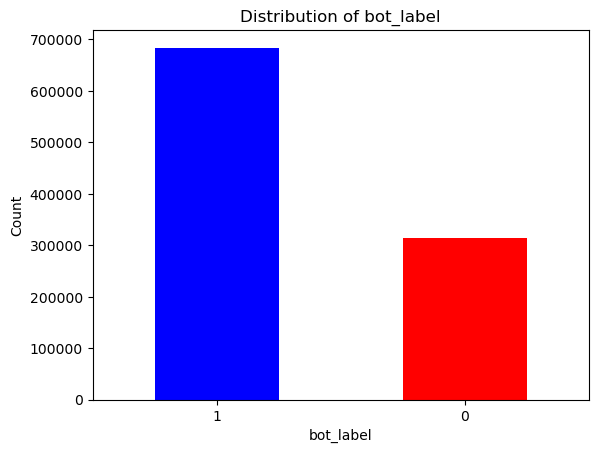

Class balance ratio (Bot/Non-bot): 2.18


In [80]:
import matplotlib.pyplot as plt

label_distribution = data['bot_label'].value_counts()

# Plot the distribution
label_distribution.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('bot_label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Distribution of bot_label')
plt.show()

# Calculate the class balance
balance_ratio = label_distribution[1] / label_distribution[0]
print(f'Class balance ratio (Bot/Non-bot): {balance_ratio:.2f}')

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score














In [92]:
# Assuming 'data' is your DataFrame with the selected features and 'bot_label' as the target variable
import pandas as pd

# Assuming 'data' is your DataFrame with one-hot encoded columns
X = data[['is_mobile', 'is_desktop', 'is_bot'] + 
         [col for col in data.columns if col.startswith('os_')] +
         [col for col in data.columns if col.startswith('client_name_')] +
         [col for col in data.columns if col.startswith('os_name_')]]

y = data['bot_label']


In [93]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Define individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

In [95]:
# Create a Voting Classifier that combines the predictions from different classifiers
voting_classifier = VotingClassifier(
    estimators=[
        ('rf', rf_classifier),
        ('gb', gb_classifier),
        ('lr', lr_classifier),
        ('dt', dt_classifier)
    ],
    voting='soft'  # 'soft' for weighted voting based on class probabilities
)

In [96]:
# Fit the ensemble model on the training data
voting_classifier.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [97]:

# Make predictions on the test data
y_pred = voting_classifier.predict(X_test)

In [98]:
# Evaluate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy:.2f}')

Ensemble Model Accuracy: 0.69
